## Life Cycle of Machine Learning

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratoy Data Analysis
- Data Pre-processing
- Model Training
- Choose the best Model

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [10]:
#Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

## Read The Dataset as DataFrame

In [11]:
df = pd.read_csv(r'D:\Projects\Diamond Prediction Price\Notebook\Data\gemstone.csv')

In [12]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
df.shape

(193573, 11)

In [14]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

id
[0 1 2 3 4]
193573
carat
[1.52 2.03 0.7  0.32 1.7 ]
248
cut
['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
5
color
['F' 'J' 'G' 'E' 'D']
7
clarity
['VS2' 'SI2' 'VS1' 'SI1' 'IF']
8
depth
[62.2 62.  61.2 61.6 62.6]
153
table
[58. 57. 56. 59. 54.]
108
x
[7.27 8.06 5.69 4.38 7.65]
522
y
[7.33 8.12 5.73 4.41 7.61]
521
z
[4.55 5.05 3.5  2.71 4.77]
349
price
[13619 13387  2772   666 14453]
8738


In [15]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [19]:
# df=df.drop(labels=['id'],axis=1)

In [20]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [21]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


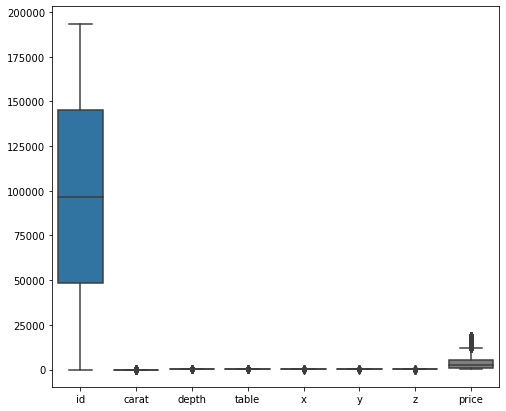

In [22]:
plt.figure(figsize=(8,7),facecolor='w')
sns.boxplot(data=df)
plt.show()

In [23]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [24]:
def out_lier(df,columns):
    q25,q75=df[columns].quantile([0.25,0.75])
    iqr=q75-q25
    lower,upper=q25-1.5*iqr,q75+1.5*iqr
    print(f"The IQR is {iqr:.2f}")
    print(f"The lower bound is {lower:.2f}")
    print(f"The upper bound is {upper:.2f}")
    
    outliers=df[(df[columns]<lower)|(df[columns]>upper)]
    print(f"The total number of outliers:{outliers.shape[0]}")
  
columns=['carat', 'depth', 'table', 'x', 'y', 'z',
       'price'] 
for column in columns:
    print(column)
    out_lier(df,column)
    print()
        

carat
The IQR is 0.63
The lower bound is -0.55
The upper bound is 1.98
The total number of outliers:7653

depth
The IQR is 1.10
The lower bound is 59.65
The upper bound is 64.05
The total number of outliers:9930

table
The IQR is 2.00
The lower bound is 53.00
The upper bound is 61.00
The total number of outliers:4366

x
The IQR is 1.81
The lower bound is 1.99
The upper bound is 9.22
The total number of outliers:17

y
The IQR is 1.80
The lower bound is 2.01
The upper bound is 9.21
The total number of outliers:14

z
The IQR is 1.13
The lower bound is 1.20
The upper bound is 5.73
The total number of outliers:18

price
The IQR is 4457.00
The lower bound is -5734.50
The upper bound is 12093.50
The total number of outliers:12649



In [25]:
def imputer_outlier(df,columns):
    q1,q3=df[columns].quantile([0.25,0.75])
    iqr=q3-q1
    lower_tail,upper_tail=q1-1.5*iqr,q3+1.5*iqr
    median=df[columns].median()
    df[columns]=df[columns].apply(lambda x:median if x<lower_tail or x>upper_tail else  x)
    print(f"outliers in {columns} have been replaced with median")
columns=['carat', 'depth', 'table', 'x', 'y', 'z',
       'price']
for column in columns:
    imputer_outlier(df,column)

outliers in carat have been replaced with median
outliers in depth have been replaced with median
outliers in table have been replaced with median
outliers in x have been replaced with median
outliers in y have been replaced with median
outliers in z have been replaced with median
outliers in price have been replaced with median


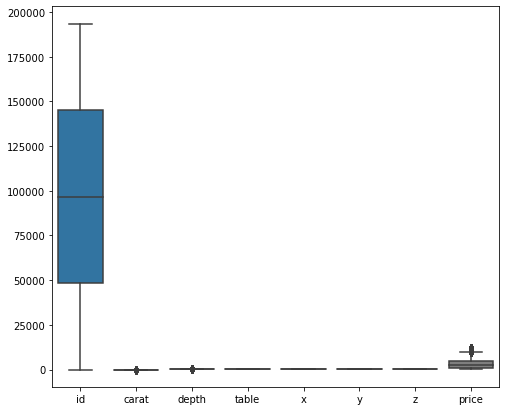

In [26]:
plt.figure(figsize=(8,7),facecolor='w')
sns.boxplot(data=df)
plt.show()

## Explarotory analysis
### Target analysis

In [27]:
df.price.value_counts(normalize=True)*100

2401.0     6.583563
544.0      0.279998
605.0      0.239703
789.0      0.234537
828.0      0.226271
             ...   
9968.0     0.000517
4621.0     0.000517
10134.0    0.000517
3395.0     0.000517
11721.0    0.000517
Name: price, Length: 7301, dtype: float64

In [28]:
## Defining numerical and categorical columns

categorical_col=df.columns[df.dtypes=="object"]
categorical_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [29]:
numerical_col=df.columns[df.dtypes!="object"]
numerical_col

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

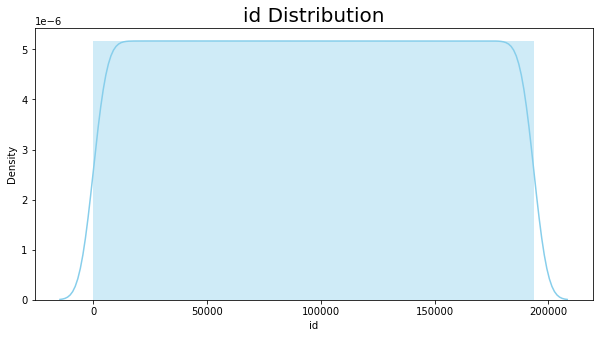

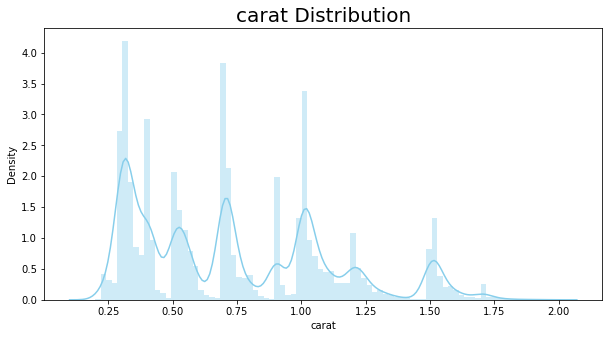

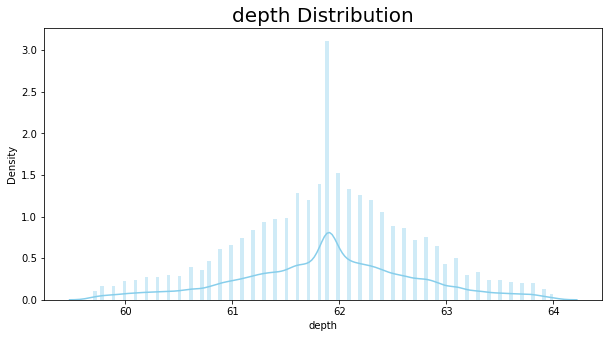

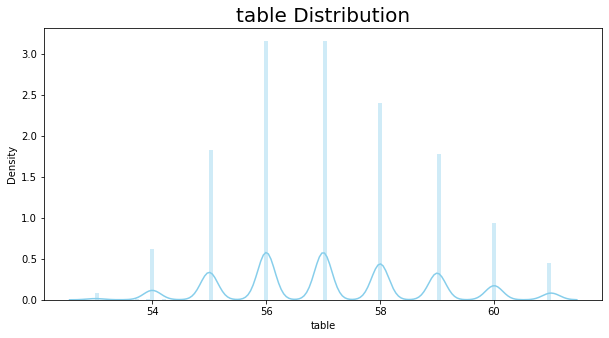

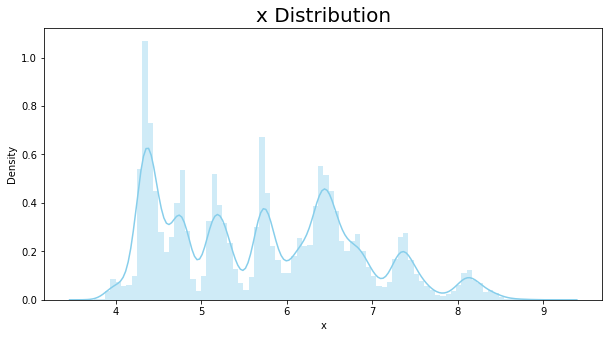

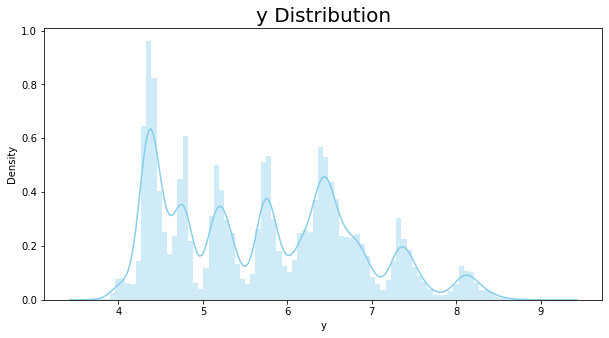

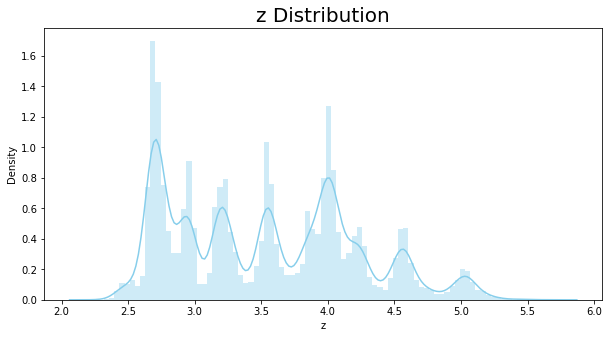

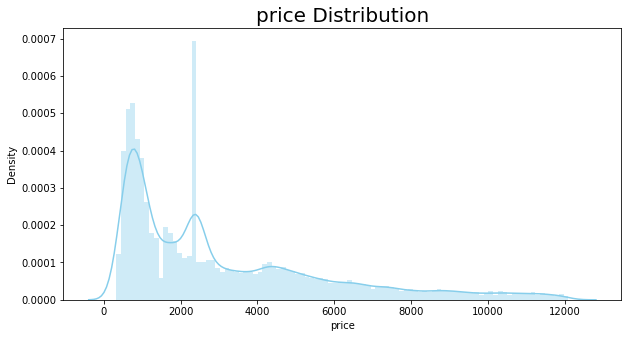

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in numerical_col:
    plt.figure(figsize=(10,5),facecolor='w')
    sns.distplot(df[feature],color='skyblue',bins='auto')
    plt.title(f'{feature} Distribution',fontsize=20)
    plt.show()

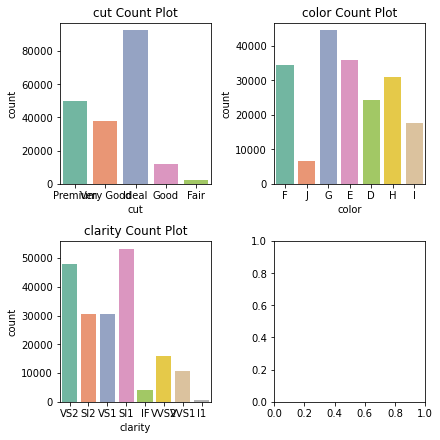

In [31]:
num_plots=len(categorical_col)
total_columns=2
total_rows=(num_plots+total_columns -1)//total_columns
fig,axs=plt.subplots(nrows=total_rows,ncols=total_columns,figsize=(3*total_columns,3*total_rows),constrained_layout=True)

axs=axs.flatten()
for i, var in enumerate(categorical_col):
    sns.countplot(x=var, data=df, ax=axs[i], palette='Set2')
    axs[i].set_title(f'{var} Count Plot')

In [32]:
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,2401.0
1,1,0.70,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,2401.0


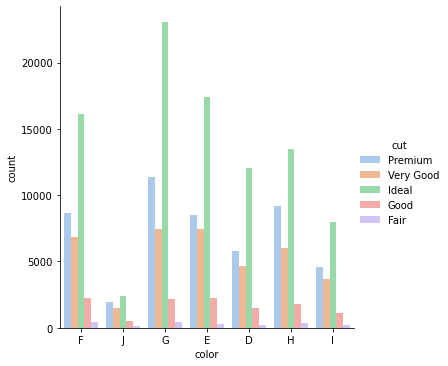

In [33]:
sns.catplot(data=df,kind='count',x='color',hue='cut',palette='pastel')
plt.show()

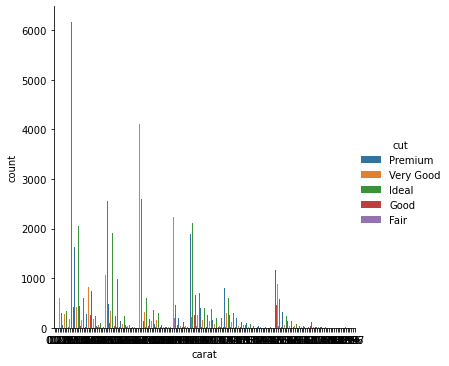

In [34]:
sns.catplot(data=df,kind='count',x='carat',hue='cut')

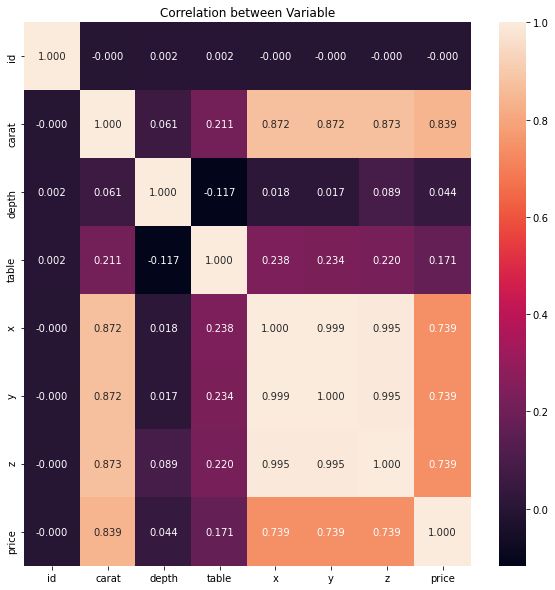

In [35]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt='.3f')
plt.title('Correlation between Variable')
plt.show()

In [36]:
df.drop(labels='id',inplace=True,axis=1)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,2401.0
1,0.70,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,2401.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,2401.0


In [38]:
df.to_csv("cleaned_data.csv")